In [36]:
from sympy import *
init_printing()
# Givens
r_w = symbols("r_w", real=True, finite=True, positive=True)
r_p = symbols("r_p", real=True, finite=True, positive=True)
I_p = symbols("I_p", real=True, finite=True, positive=True)
I_w = symbols("I_w", real=True, finite=True, positive=True)
omega_wi = symbols("\\omega_{wi}", real=True, finite=True, positive=True)
m_p = symbols("m_p", real=True, finite=True, positive=True)

# Unknowns
J_w = symbols("J_w", real=True, finite=True, positive=True)
J_h = symbols("J_h", real=True, finite=True, positive=True)
omega_wf = symbols("\\omega_{wf}", real=True, finite=True, positive=True)
omega_p = symbols("\\omega_p", real=True, finite=True, positive=True)
v_p = symbols("v_p", real=True, finite=True, positive=True)


# Assumptions

1. The projectile is rolling against the hood when it exits the shooter.
2. The projectile is rolling against the shooter wheel when it exits the shooter.
3. The shooter wheel has a radius $r_w$, a moment of inertia of $I_w$, and an initial rotational velocity of $\omega_{wi}$.
4. The projectile has a radius $r_p$, a moment of inertia of $I_p$, and an initial rotational velocity of 0.
5. While the projectile is in the shooter:
    1. The contact between the surface of the shooter wheel and the surface of the projectile produces an impulse on each of them (in opposite directions). This impulse decreases the shooter wheel's rotational velocity, and increases both the projectile's rotational velocity, and its linear velocity.
    2. The contact between the hood and the surface of the projectile produces an additional impulse on the projectile, on the opposite side and in the opposite direction. This contact increases the projectile's rotational velocity, but decreases it linear velocity.
    3. There are no other torques or forces acting on either the shooter wheel or the projectile. The projectile spends so little time in the shooter that any attempt to compensate for the decrease in shooter wheel speed will not occur until after the projectile has exited.
6. The mass and moment of inertia of the robot is high enough that neither impulse meaningfully changes the linear or rotational velocity of the robot. As a result the shooter wheel axle and the contact point with the hood are assumed to be fixed.

# The problem

Given $r_p$, $I_p$, $r_w$, $I_w$, and $\omega_{wi}$, find the projectile's linear velocity $v_p$ and rotational velocity $\omega_p$ as well as the shooter wheel's final rotational velocity $\omega_{wf}$.

To do this it will be useful to introduce 2 additional unknowns, the magnitudes of the impulses on the wheel side and the hood side of the projectile, $J_w$ and $J_h$ respectively.

# What physics tells us

An object's linear momentum is equal to its mass times its linear velocity.

An impulse causes a change in an object's linear momentum equal to the magnitude of the impulse.

So:

In [52]:
eq1=Eq(m_p*v_p, J_w-J_h)
display(eq1)

SyntaxError: invalid syntax (852954953.py, line 3)

An object's angular momentum is equal to its moment of inertial times its rotation velocity.

An impulse whose direction is perpendicular to the line between an object's center of mass and the point of contact causes a change in the object's angular momentum (about it's center of mass) equal to the magnitude of the impulse times the distance to the point of contact.

So:

In [43]:
eq2=Eq(I_p*omega_p, J_h*r_p+J_w*r_p)
eq3=Eq(I_w*omega_wi-I_w*omega_wf, J_w*r_w)
display(eq2)
display(eq3)

Since we are assuming that when the projectile exits the shooter it is rolling against the hood, it's linear velocity will be half of the linear velocity of the point opposite the hood. So projectile's linear velocity will be half of the linear velocity of the point where the projectile is contacting the wheel. Since the projectile is also rolling against the wheel, the linear velocity of that point is the same as the linear velocity of a point on the surface of the wheel. The linear velocity of a point on a rotating object is the rotational velocity times the distance from the center of rotation to the point.

In [44]:
eq4=Eq(v_p,(omega_wf*r_w)/2)
display(eq4)

Since the projectile is rolling against the hood, it's linear velocity must also be the same as the linear velocity of a point on the surface of the projectile in when viewed from a frame of reference that is moving at the same linear velocity as the projectile.

In [45]:
eq5=Eq(v_p,omega_p*r_p)
display(eq5)

We now have 5 equations and 5 unknowns. Solving them gives:

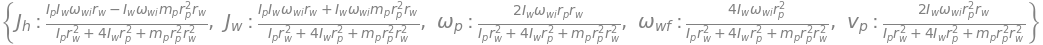

In [48]:
sols = solve([eq1, eq2, eq3, eq4, eq5], [v_p, omega_p, omega_wf, J_w, J_h])
display(sols)